# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')
X, y = mnist.data, mnist.target

In [3]:
'''Also, I think the original just loaded in as np.array directly and here we have a dataframe and series. So when we are looking for a specific row we can use the .iloc attribute.And we can convert a pandas dataseries to a numpy array with:

np.array(somedataseries)

This will give us access to numpy methods such as reshape (mentioned in the lab)'''

'Also, I think the original just loaded in as np.array directly and here we have a dataframe and series. So when we are looking for a specific row we can use the .iloc attribute.And we can convert a pandas dataseries to a numpy array with:\n\nnp.array(somedataseries)\n\nThis will give us access to numpy methods such as reshape (mentioned in the lab)'

### Now take a look at the shapes of the X and y matricies 

In [4]:
display(X.shape, y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [5]:
display(X.iloc[36000], y.iloc[36000])

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 36000, Length: 784, dtype: int64

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

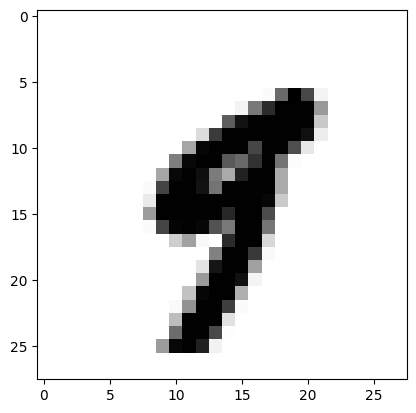

In [6]:
X_train = X.values.reshape(X.values.shape[0], 28, 28, 1)
#y_train = 
image = X_train[36000]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [7]:
display(y[36000])

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [8]:
# Split the data into training/testing sets
X_train = X[:60000]
X_test = X[60000:]
# Use only one feature

# Split the targets into training/testing sets
y_train = y[:60000]
y_test = y[60000:]

In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [10]:
y_train_5 = y_train.apply(lambda x: x if x == '5' else '-1')
y_test_5 = y_test.apply(lambda x: x if x == '5' else '-1')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train_5)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)
score = clf.score(X_train, y_train_5)
display(pred, len(pred), pred_proba, score)

/Users/sirinekefi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['-1', '-1', '-1', ..., '-1', '5', '-1'], dtype=object)

10000

array([[9.99773668e-01, 2.26331913e-04],
       [9.61298259e-01, 3.87017412e-02],
       [9.92695576e-01, 7.30442394e-03],
       ...,
       [9.97817008e-01, 2.18299160e-03],
       [3.38356263e-03, 9.96616437e-01],
       [9.99846903e-01, 1.53097070e-04]])

0.9778166666666667

### Does the classifier predict correctly the 36000th digit we picked before?

In [12]:
clf.predict(X_train.iloc[36000].array.reshape(1,-1))

/Users/sirinekefi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['-1'], dtype=object)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [20]:
new_clf = never_5_clf.fit(X_train, y_train)
new_pred = new_clf.predict(X_test)
display(new_cl, new_pred)

AttributeError: 'NoneType' object has no attribute 'predict'

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?